# Fitting a Function to Artificial Data: An Introduction to Gradient Descent Algorithm

## Welcome to this educational Jupyter file, where we will explore the Gradient Descent algorithm and its variations in the context of fitting a function to artificial data.

#### Here, I will cover three key variations of Gradient Descent: Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent. I will begin by explicitly coding the closed forms of the derivatives and later demonstrate how Tensorflow can be used to calculate the derivatives more efficiently.

#### Throughout this file, I will focus on the simplicity of one-dimensional input and one-dimensional output, allowing us to grasp the core principles of these algorithms without unnecessary complexity.

#### I will begin by fitting a line, followed by fitting second, third, and sixth-degree polynomials to the data. Additionally, I will investigate fitting a function derived from the first five components of the Fourier series to our dataset. Lastly, we will experiment with fitting mixture functions.

#### Let's get started and unravel the power of Gradient Descent in action!

## First Step: Generate artificial input and output


In [21]:
import numpy as np
def generate_x(input_low_end, input_high_end, number_of_data):
    xs = np.linspace(start=input_low_end,
                          stop=input_high_end,
                          num=number_of_data)
    return xs

In [22]:
xs = generate_x(input_low_end=0, input_high_end=10, number_of_data=100)

In [23]:
import numpy as np
def math_function(x):
    return x + np.math.sin(x*3)

In [24]:
ys = np.array([math_function(x) for x in xs])

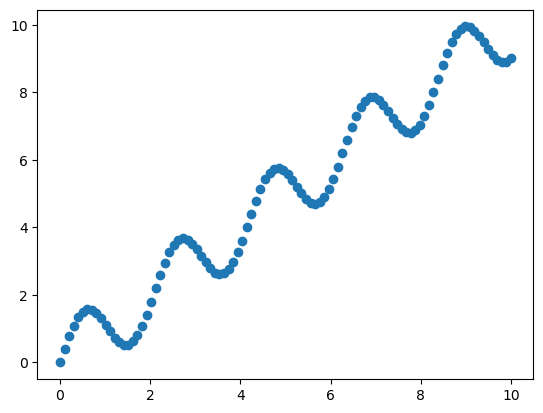

In [25]:
from matplotlib import pyplot as plt
plt.scatter(xs,ys)
plt.show()

## Fitting a degree-1 polynomial (line) to data - Closed form

### Stochatic Gradient Descent

In [26]:
import random
def sgd_update_degree1_closed_form(old_slope, old_intercept, x_train, y_train, learning_rate):
    randomly_selected_index = random.randint(0, len(xs)-1)

    selected_x = x_train[randomly_selected_index]
    selected_y = y_train[randomly_selected_index]

    #Derivatives:
    dLoss_dSlope = 2 * selected_x * (old_slope * selected_x + old_intercept - selected_y)
    dLoss_dIntercept = 2 * (old_slope * selected_x + old_intercept - selected_y)

    new_slope = old_slope - learning_rate * dLoss_dSlope
    new_intercept = old_intercept - learning_rate * dLoss_dIntercept

    return new_slope, new_intercept

### Gradient Descent

In [27]:
def gd_update_degree1_closed_form(old_slope, old_intercept, x_train, y_train, learning_rate):
    #Derivatives:
    dLoss_dSlope = 0
    dLoss_dIntercept = 0
    for x, y in zip(x_train, y_train):
        dLoss_dSlope = 2 * x * (old_slope * x + old_intercept - y)
        dLoss_dIntercept = 2 * (old_slope * x + old_intercept - y)

    dLoss_dSlope /= len(x_train)
    dLoss_dIntercept /= len(x_train)

    new_slope = old_slope - learning_rate * dLoss_dSlope
    new_intercept = old_intercept - learning_rate * dLoss_dIntercept

    return new_slope, new_intercept

### Mini-Batch Gradient Descent

In [28]:
def mini_batch_gd_update_degree1_closed_form(old_slope, old_intercept, x_train, y_train, learning_rate):

    batch_size = 16
    indices = np.random.randint(0, x_train.shape[0], batch_size)
    x_batch = x_train[indices]
    y_batch = y_train[indices]
    #Derivatives:
    dLoss_dSlope = 0
    dLoss_dIntercept = 0
    for x, y in zip(x_batch, y_batch):
        dLoss_dSlope = 2 * x * (old_slope * x + old_intercept - y)
        dLoss_dIntercept = 2 * (old_slope * x + old_intercept - y)

    dLoss_dSlope /= len(x_batch)
    dLoss_dIntercept /= len(y_batch)

    new_slope = old_slope - learning_rate * dLoss_dSlope
    new_intercept = old_intercept - learning_rate * dLoss_dIntercept

    return new_slope, new_intercept

### Training

In [29]:
def train_degree1(initial_guess_for_slope,
          initial_guess_for_intercept,
          x_train,
          y_train,
          learning_rate,
          update_method_function,
          number_of_iterations):

    slope = initial_guess_for_slope
    intercept = initial_guess_for_intercept

    for _ in range(number_of_iterations):
        slope, intercept = update_method_function(slope, intercept, x_train, y_train, learning_rate)

    return slope, intercept

In [30]:
slope1, intercept1 = train_degree1(initial_guess_for_slope=1,
      initial_guess_for_intercept=1,
      x_train=xs,
      y_train=ys,
      learning_rate=0.01,
      update_method_function=mini_batch_gd_update_degree1_closed_form,
      number_of_iterations=10000)

In [31]:
print('slope: ', slope1)
print('intercept: ', intercept1)

slope:  0.9906732332395165
intercept:  0.20478440454442076


In [32]:
ys_prediction1 = [x*slope1 + intercept1 for x in xs]

In [33]:
def scatter_plot(xs, ys, ys_pred):
    scatter1 = plt.scatter(xs, ys, c='blue')
    scatter2 = plt.scatter(xs, ys_pred, c='red')
    plt.legend((scatter1, scatter2), ('y values', 'predicted y values'))
    plt.show()

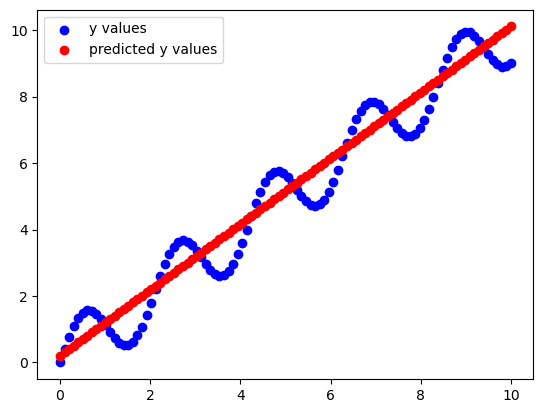

In [34]:
scatter_plot(xs, ys, ys_prediction1)

## Fitting a degree-1 polynomial (line) to data - using tensorflow for calculating the derivatives

### Mini-Batch Gradient Descent

In [35]:
import tensorflow as tf
def mini_batch_gd_update_degree1_tf(old_slope, old_intercept, x_train, y_train, learning_rate):

    batch_size = 16
    indices = np.random.randint(0, x_train.shape[0], batch_size)
    x_batch = x_train[indices]
    y_batch = y_train[indices]

    x_batch = tf.constant(x_batch, dtype=float)
    y_batch = tf.constant(y_batch, dtype=float)

    old_slope = tf.constant(old_slope, dtype=float)
    old_intercept = tf.constant(old_intercept, dtype=float)
    #Derivatives:
    dLoss_dSlope = tf.Variable(0.)
    dLoss_dIntercept = tf.Variable(0.)
    for x, y in zip(x_batch, y_batch):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch([old_slope, old_intercept])
            y_pred = x * old_slope + old_intercept
            loss = ( y - y_pred ) ** 2

        dLoss_dSlope.assign_add (tape.gradient(loss, old_slope) )
        dLoss_dIntercept.assign_add( tape.gradient(loss, old_intercept) )

    dLoss_dSlope = dLoss_dSlope.numpy()
    dLoss_dIntercept = dLoss_dIntercept.numpy()

    dLoss_dSlope /= len(x_batch)
    dLoss_dIntercept /= len(y_batch)

    new_slope = old_slope - learning_rate * dLoss_dSlope
    new_intercept = old_intercept - learning_rate * dLoss_dIntercept

    return new_slope, new_intercept

In [36]:
slope2, intercept2 = train_degree1(initial_guess_for_slope=0,
      initial_guess_for_intercept=0,
      x_train=xs,
      y_train=ys,
      learning_rate=0.01,
      update_method_function=mini_batch_gd_update_degree1_tf,
      number_of_iterations=100)

In [37]:
print('slope: ', slope2)
print('intercept: ', intercept2)

slope:  tf.Tensor(0.96926993, shape=(), dtype=float32)
intercept:  tf.Tensor(0.16649933, shape=(), dtype=float32)


In [38]:
ys_prediction2 = [x*slope2 + intercept2 for x in xs]

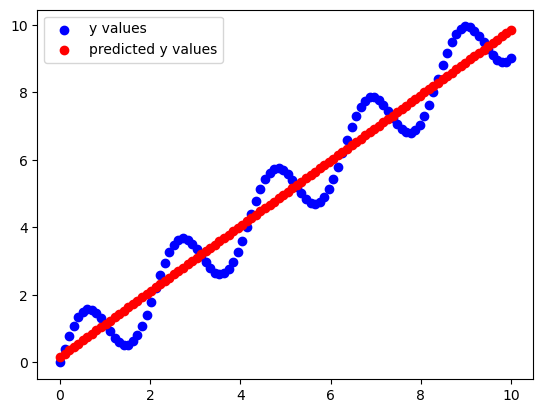

In [39]:
scatter_plot(xs, ys, ys_prediction2)

## Fitting a degree-2 polynomial to data - using tensorflow for calculating the derivatives
### y = a + bx + cx^2

### Mini-Batch Gradient Descent

In [76]:
import tensorflow as tf
def mini_batch_gd_update_quadratic_tf(a, b, c, x_train, y_train, learning_rate):

    batch_size = 16
    indices = np.random.randint(0, x_train.shape[0], batch_size)
    x_batch = x_train[indices]
    y_batch = y_train[indices]

    x_batch = tf.constant(x_batch, dtype=float)
    y_batch = tf.constant(y_batch, dtype=float)

    a = tf.constant(a, dtype=float)
    b = tf.constant(b, dtype=float)
    c = tf.constant(c, dtype=float)

    dLoss_dA = tf.Variable( 0. )
    dLoss_dB = tf.Variable( 0. )
    dLoss_dC = tf.Variable( 0. )
    for x, y in zip(x_batch, y_batch):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch([a, b, c])
            # y_pred = loss_function(variables, x)
            y_pred = a + b * x + c * x**2
            loss = abs( y_pred  - y)
            # loss = ( y_pred  - y) ** 2

        dLoss_dA.assign_add (tape.gradient(loss, a) )
        dLoss_dB.assign_add (tape.gradient(loss, b) )
        dLoss_dC.assign_add (tape.gradient(loss, c) )

    dLoss_dA = dLoss_dA.numpy()
    dLoss_dB = dLoss_dB.numpy()
    dLoss_dC = dLoss_dC.numpy()

    dLoss_dA /= len(x_batch)
    dLoss_dB /= len(x_batch)
    dLoss_dC /= len(x_batch)

    #optimizer.apply_gradients(zip([dLoss_dVariables], [variables]))
    new_a =  a - learning_rate * dLoss_dA
    new_b =  b - learning_rate * dLoss_dB
    new_c =  c - learning_rate * dLoss_dC
    return new_a, new_b, new_c

In [77]:
def train_quadratic(initial_a,
                             initial_b,
                             initial_c,
                             x_train,
                             y_train,
                             learning_rate,
                             update_method_function,
                             number_of_iterations):

    for _ in range(number_of_iterations):
        initial_a, initial_b, initial_c = update_method_function(initial_a, initial_b, initial_c, x_train, y_train, learning_rate)

    return initial_a, initial_b, initial_c

In [78]:
a,b,c = train_quadratic(1.,
                         1.,
                         1.,
                         x_train=xs,
                         y_train=ys,
                         learning_rate=0.001,
                         update_method_function=mini_batch_gd_update_quadratic_tf,
                         number_of_iterations=1000)

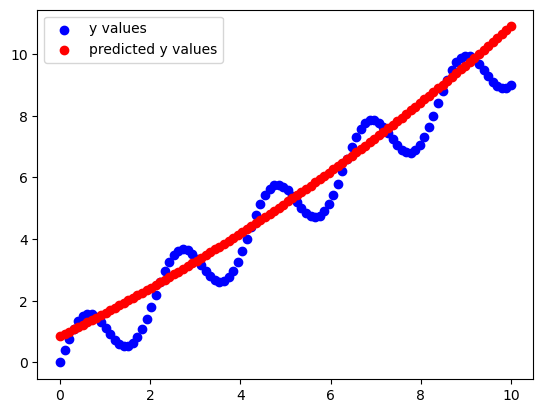

In [79]:
ys_prediction3 = [a + b*x + c*x**2 for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Mini-Batch Gradient Descent (Implict)

In [80]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
def mini_batch_gd_update_arbitrary_function_tf(variables, loss_function, x_train, y_train, learning_rate):

    batch_size = 16
    indices = np.random.randint(0, x_train.shape[0], batch_size)
    x_batch = x_train[indices]
    y_batch = y_train[indices]

    x_batch = tf.constant(x_batch, dtype=float)
    y_batch = tf.constant(y_batch, dtype=float)

    variables= tf.constant(variables)

    dLoss_dVariables = tf.Variable( tf.zeros_like(variables) )
    for x, y in zip(x_batch, y_batch):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(variables)
            y_pred = loss_function(variables, x)
            #loss = ( y_pred  - y)**2
            loss = abs( y_pred  - y)

        dLoss_dVariables.assign_add (tape.gradient(loss, variables) )

    dLoss_dVariables = dLoss_dVariables.numpy()

    dLoss_dVariables /= len(x_batch)

    #adam.apply_gradients(zip([dLoss_dVariables], [variables]))
    dLoss_dVariables =  variables - learning_rate * dLoss_dVariables

    return dLoss_dVariables

In [81]:
def train_arbitrary_function(variables,
                             loss_function,
                             x_train,
                             y_train,
                             learning_rate,
                             update_method_function,
                             number_of_iterations):

    for _ in range(number_of_iterations):
        variables = update_method_function(variables, loss_function, x_train, y_train, learning_rate)

    return variables

In [82]:
@tf.function
def quadratic(variables, x):
    return  variables[0] + variables[1] * x + variables[2] * x**2

In [94]:
a,b,c = train_arbitrary_function([1.,
                         1.,
                         1.],
                        loss_function=quadratic,
                         x_train=xs,
                         y_train=ys,
                         learning_rate=0.001,
                         update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                         number_of_iterations=200)

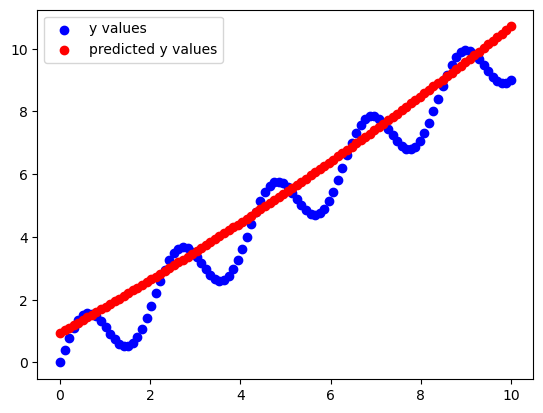

In [96]:
ys_prediction3 = [a + b*x + c*x**2 for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Fitting a degree-3 polynomial (Trinomial) to data
### As the polynomial gets to higher degrees, the correct choice of the learning rate and the number iterations gets harder.

In [98]:
@tf.function
def trinomial(variables, x):
    return  variables[0] + variables[1] * x + variables[2] * (x**2) + variables[3] * (x**3)

In [105]:
a,b,c,d = train_arbitrary_function([1., 1., 1., 1.],
                                loss_function=trinomial,
                                 x_train=xs,
                                 y_train=ys,
                                 learning_rate=0.0001,
                                 update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                                 number_of_iterations=5000)

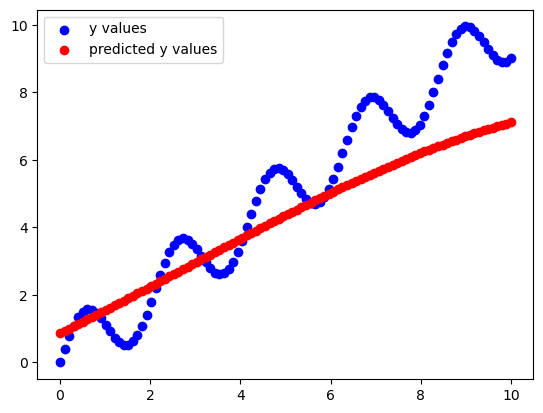

In [106]:
ys_prediction3 = [a + b*x + c*(x**2) + d*(x**3) for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Fitting a degree-3 polynomial (Sextic) to data

In [108]:
@tf.function
def sextic(variables, x):
    return  variables[0] + variables[1] * x + variables[2] * x**2 + variables[3] * x**3 + variables[4] * x**4 + variables[5] * x**5 + variables[6] * x**6

In [115]:
a,b,c,d,e,f,g = train_arbitrary_function([1., 0., 0., 0., 0., 0., 0.],
                                loss_function=sextic,
                                 x_train=xs,
                                 y_train=ys,
                                 learning_rate=0.0001,
                                 update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                                 number_of_iterations=200)

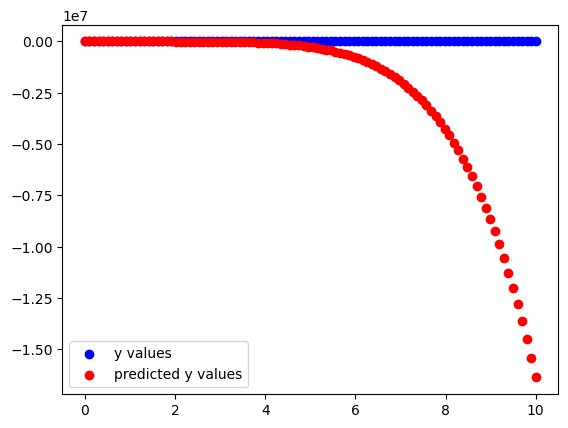

In [116]:
ys_prediction3 = [a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6  for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Fitting a Fourier function (first five elements of the Fourier Series) to data

In [117]:
@tf.function
def fourier5(variables, x):
    return  variables[0] + variables[1] * tf.math.cos(x) + variables[2] * tf.math.cos(2*x) + variables[3] * tf.math.sin(x) + variables[4] * tf.math.sin(2*x)

In [118]:
a,b,c,d,e = train_arbitrary_function([1., 1., 1., 1., 1.],
                                loss_function=fourier5,
                                 x_train=xs,
                                 y_train=ys,
                                 learning_rate=0.01,
                                 update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                                 number_of_iterations=100)

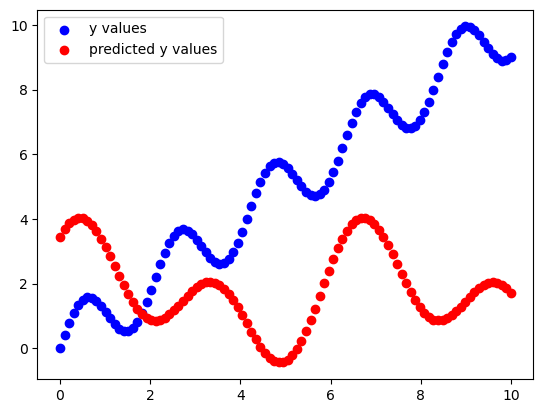

In [119]:
ys_prediction3 = [a + b * np.math.cos(x) + c* np.math.cos(2*x) + d* np.math.sin(x) + e* np.math.sin(2*x)  for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Fitting a mixture of trimmed Fourier and polynomials to data

In [120]:
@tf.function
def fourier5(variables, x):
    return  variables[0] + variables[1] * tf.math.cos(x) + variables[2] * tf.math.cos(2*x) + variables[3] * tf.math.sin(x) + variables[4] * tf.math.sin(2*x)  + variables[5] * x

In [121]:
a,b,c,d,e,f = train_arbitrary_function([1., 1., 1., 1., 1.,1.],
                                loss_function=fourier5,
                                 x_train=xs,
                                 y_train=ys,
                                 learning_rate=0.001,
                                 update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                                 number_of_iterations=2000)

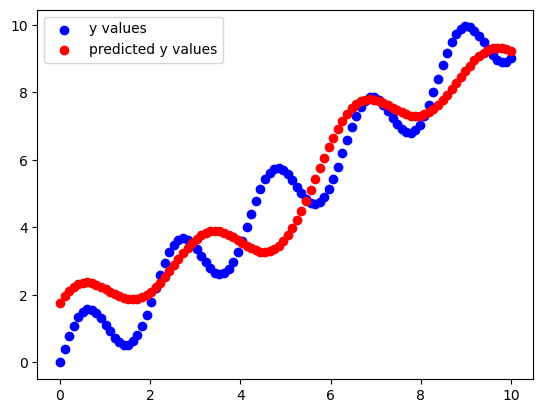

In [42]:
ys_prediction3 = [a + b * np.math.cos(x) + c* np.math.cos(2*x) + d* np.math.sin(x) + e* np.math.sin(2*x) + f* x for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Fitting a mixture of trimmed Fourier and polynomials to data (2)

In [52]:
@tf.function
def fourier6(variables, x):
    return  variables[0] + variables[1] * tf.math.sin(x) + variables[2] * x

In [55]:
a,b,c = train_arbitrary_function([1., 1., 1.],
                                loss_function=fourier6,
                                 x_train=xs,
                                 y_train=ys,
                                 learning_rate=0.001,
                                 update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                                 number_of_iterations=1000)

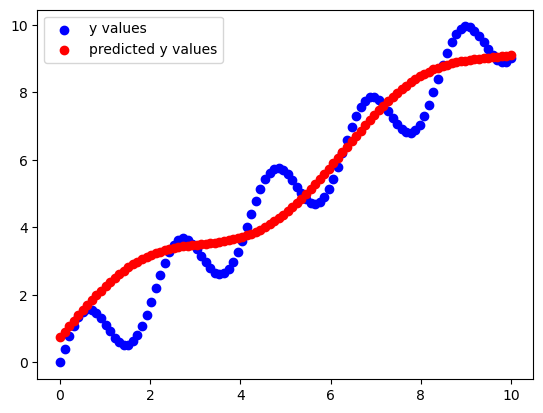

In [56]:
ys_prediction3 = [a + b*np.math.sin(x)  + c*x for x in xs]
scatter_plot(xs, ys, ys_prediction3)

## Fitting a mixture of trimmed Fourier and polynomials to data (3)

In [67]:
@tf.function
def fourier7(variables, x):
    return  variables[0] + variables[1] * tf.math.sin(variables[2]*x) + variables[3] * x

In [78]:
a,b,c,d = train_arbitrary_function([0., 1., 2., 1.],
                                loss_function=fourier7,
                                 x_train=xs,
                                 y_train=ys,
                                 learning_rate=0.001,
                                 update_method_function=mini_batch_gd_update_arbitrary_function_tf,
                                 number_of_iterations=100000)

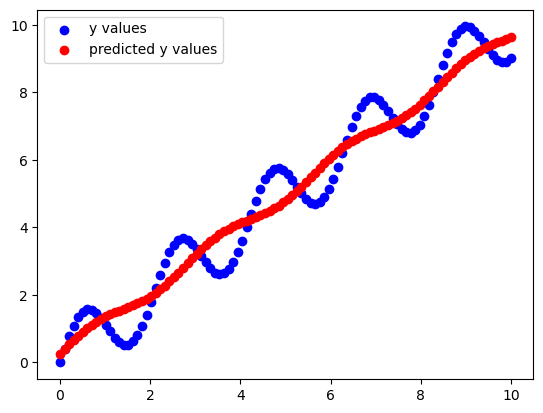

In [79]:
ys_prediction3 = [a + b*np.math.sin(c*x)  + d*x for x in xs]
scatter_plot(xs, ys, ys_prediction3)